# Puntos fijos, periocidad y dependencia de condiciones iniciales para el atractor de Lorenz, de Rössler y Chen Lee respectivamente usando el metódo Runge-Kutta de cuarto orden (RK4) 

En 1963 Lorenz introdujó a la ciencia el concepto del caos. Lorenz hacia trabajo computacional para predecir el estado meterologico proximo, en una ocasión al introducir solo unas cifras significativas menos en uno de sus datos, obtuvo resultados del clima totalmente diferentes, noto que un pequeñisimo cambio en un valor inicial marcaba una trayectoria totalmente diferente, de ahi comenzaron los sistemas caoticos.

Un sistema caotico es aquel no lineal ni determinista, aquel que no se puede predecir por completo, pues no esta del todo determinado, aquel que depende de sus condiciones iniciales. Ejemplos sistemas caoticos esta el pendulo doble, la meteorologia, el famoso problema de los 3 cuerpos o el trafico; todos estos sistemas son muy sensibles a cambios diminutos en condiciones iniciales y no estan ya determinados por completo.

Por atractor nos referimos al punto en el espacio donde las variables tienden en el caos, incluso cuando no hay un punto concreto de divergencia en estos sistemas, si se encuentran patrones de redirigimiento alrededor de ciertas ubicaciones en el espacio siendo esas los "atractores". El termino de "atractor extraño" se usa para describir un atractor que muestra dependencia a las condiciones iniciales (puntos que inicialmente eran cercanos exponencialmente se separan con el tiempo).
Una moción es caotica cuando esta no es periodica es decir nunca se repite, ni se cierra asi misma, su comportamiento parece impredecible. Una moción "normal" es periodica, cerrada y oscila en el tiempo.

El objetivo es solucionar los tres sistemas diferenciales caoticos elegidos y usando diferentes condiciones iniciales, lograr observar distintas propiedades que presentan estos sistemas. 


## Atractor de Lorenz
El sistema caotico presentado por Lorenz en su paper original [1] se presenta a continuación, este logra describir una aproximación de hasta una semana de las condiciones climaticas:

$\begin{equation}
\begin{matrix}
\frac{dx}{dt}= a(y-x)\\
\frac{dy}{dt}= bx-yz-xz\\
\frac{dz}{dt}= yx-cz\\
\end{matrix}
\end{equation}$

Este atractor tiene soluciones donde el atractor es un punto fijo y otras donde el atractor es extraño, en el primer caso las soluciones con el tiempo convergen a un punto fijo en el espacio mientras que en el segundo caso las soluciones no exactamente convergen si no que muestran trayectorias que parezcan seguir un patrón o llegar a un lugar. Esta diferencia se produce usando un mismo periodo de tiempo, numero de iteraciones y mismas condiciones iniciales, solo basta con cambiar el valor de un parametro del sistema de ecuaciones, el valor b. En base a [3] se implementa los sig valores de prueba.

### Caso 1. El atractor es un punto fijo, hay convergencia.

Con parametros a=15, c=3 y b=20
Un periodo de tiempo de 100 y 100000 iteraciones.
Condiciones iniciales (7,6,5).


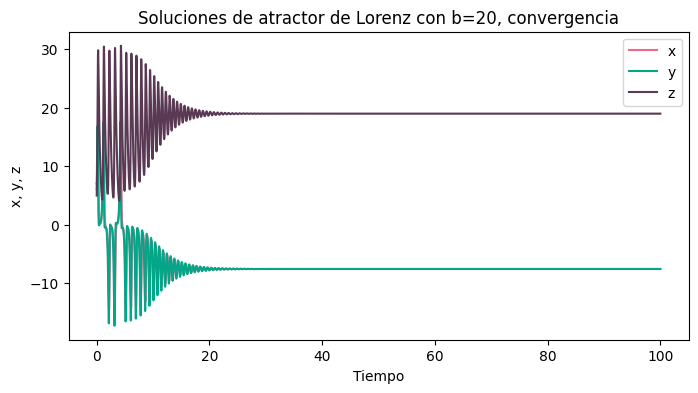

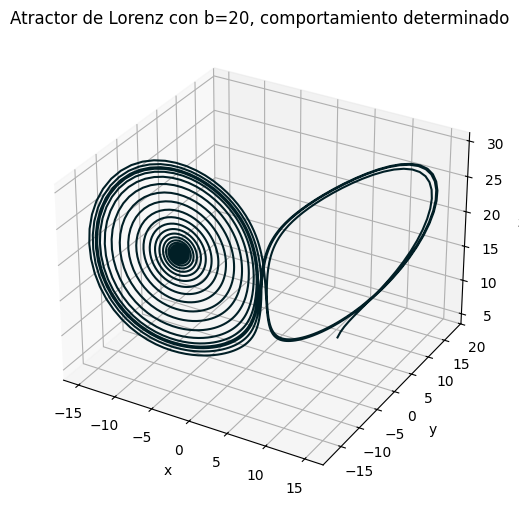

In [437]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return a*(y-x)
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return x*(b-z)-y
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return x*y-c*z

#definición de paramcetros donde se da el caos
a = 15
b = 20
c = 3
#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)
#condiciones iniciales del sistema
x = [7]
y = [6]
z = [5]

#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))


fig = plt.figure(figsize= (8,4))
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de atractor de Lorenz con b=20, convergencia")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend()
plt.show()

fig = plt.figure(figsize= (12,6))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color="#011F26")
plt.title("Atractor de Lorenz con b=20, comportamiento determinado")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

### Caso 2. Atractor extraño, no hay convergencia.

Con parametros a=15, c=3 y b=30
Un periodo de tiempo de 100 y 100000 iteraciones.
Condiciones iniciales (7,6,5).


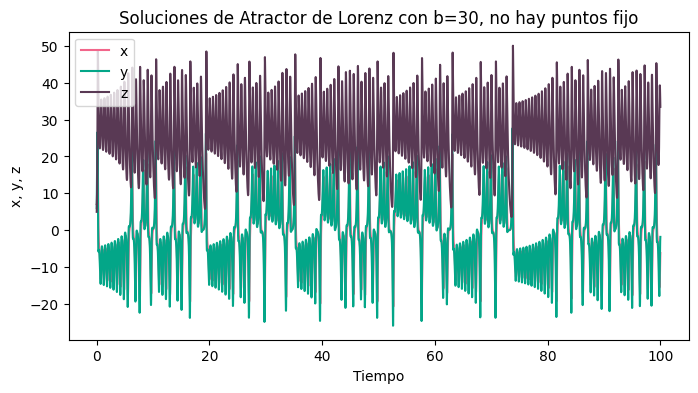

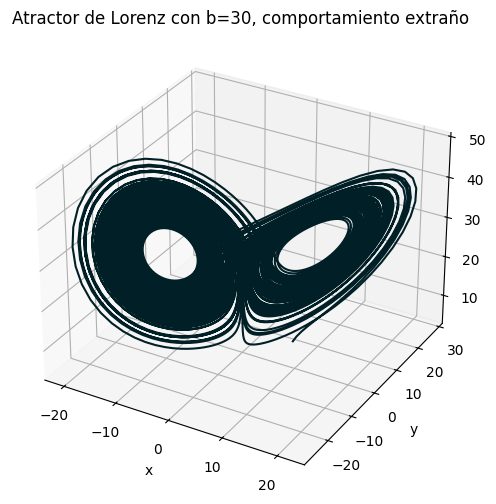

In [438]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return a*(y-x)
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return x*(b-z)-y
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return x*y-c*z

#definición de paramcetros donde se da el caos
a = 15
b = 30
c = 3
#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)
#condiciones iniciales del sistema
x = [7]
y = [6]
z = [5]

#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))

fig = plt.figure(figsize= (8,4))
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de Atractor de Lorenz con b=30, no hay puntos fijo")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend()
plt.show()

fig = plt.figure(figsize= (12,6))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color="#011F26")
plt.title("Atractor de Lorenz con b=30, comportamiento extraño")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()
     

¡Con solo cambiar 10 unidades un parametro se pasa de tener un sistema totalmente caotico a otro determinado que converge a un punto!
Puede que en la gráfica 3D no se entiende por completo la trayectoria de las soluciones pero en el espiral llenito es donde convergen al final, donde si se ve claro el comportamiento y la convergencia es en la gráfica de x,y,z soluciones con respecto al tiempo, se observa que primero si estan cambiando y luego todas toman ya un mismo valor, no más divergencia! Igual curiosamente la variable x se comporta identico a la variable y, ojo no solo para el caso 1, sucede igual para el caso 2. Y no podia faltar en este analisis la famosisima gráfica de Lorenz que es dada por el caso 2 de no puntos fijos y divergencia, si la gráfica fuera animada y el tiempo fuese grande veriamos que si bien las soluciones siguen patrones de mariposa, no van a converger en los mismos puntos, sigue y sigue creciendo y de repente con orbitas más alejadas o más cercanas entre si, ahi el caos.

## Atractor de Rössler

Del hallazgo de Lorenz, más cientificos tuvieron interes en estos sistemas y han surgido desde entonces decenas de más atractores que se comportan similar al de Lorenz, de forma caotica. En 1976 Rössler exhibió una propuesta interesante de un atractor representado por la solución del siguiente sistema de ecuaciones:

$\begin{equation}
\begin{matrix}
\frac{dx}{dt}= -y-z\\
\frac{dy}{dt}= x+ay\\
\frac{dz}{dt}= b+z(x-c)\\
\end{matrix}
\end{equation}$

Segun [4] una caracteristica interesenta que se presenta en este atractor son ciclos de periocidad y de caos intercalados con cambiar un unico parametro: c.
Ir graficando con valores diminutos de c y luego incrementandolos se nota que el atractor se comporta periodicamente con valores pequeños de c y comienza a ser caotico conforme más aumenta c, presentando más orbitas. En el primer caso, a valores pequeños de c las orbitas aumentan periodicamente, se podria describir lo que pasará pues se nota el comportamiento regular de las soluciones e incluso hay orbitas donde las soluciones se cierran y oscilan en una misma orbita, en el segundo caso, el caotico, a mayor valor de c, se fluctuan las curvas y se comienzan a ir por trayectorias extrañas, no hay periocidad y se pueden repetir orbitas pero pronto vuelven a divergir. Para poner esto a prueba se usan los mismos datos para ambos casos, solo variando el parametro c.

### Caso 1. Se presenta periocidad.
Parametros: a=b=0.2, c=0.8, tiempo=100, iteraciones=10000, valores iniciales (-0.25, -0.4,0).


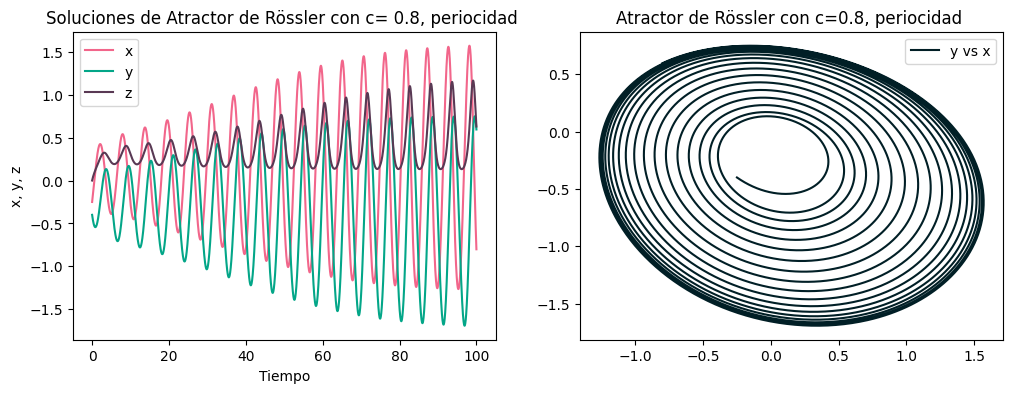

In [439]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return -y-z
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return x+a*y
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return b+z*(x-c)

#definición de paramcetros donde se da el caos
a = 0.2
b = 0.2
c = 0.8
#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)
x = [-0.25]
y = [-0.4]
z = [0]


#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))

fig = plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de Atractor de Rössler con c= 0.8, periocidad ")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend()


plt.subplot(1,2,2)
plt.plot(x,y,label="y vs x", color="#011F26")
plt.title("Atractor de Rössler con c=0.8, periocidad ")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()

### Caso 2. Comienza el caos.
Parametros: a=b=0.2, c=15.8, tiempo=100, iteraciones=10000, valores iniciales (-0.25, -0.4,0).

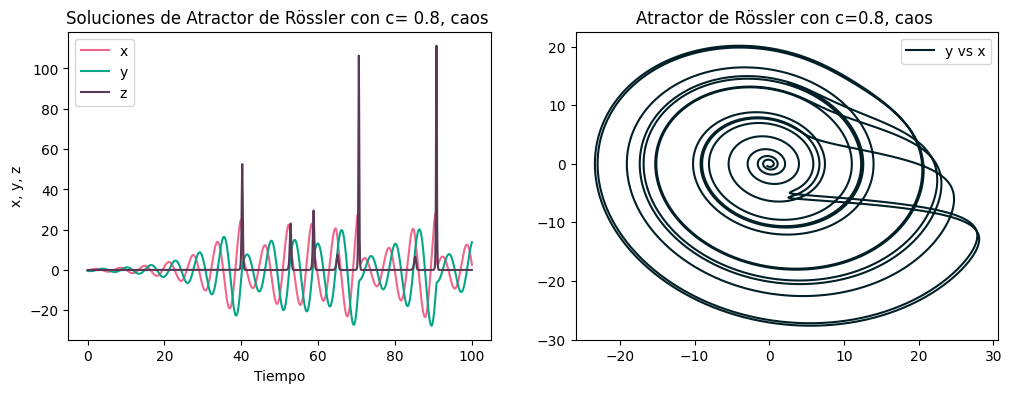

In [440]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return -y-z
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return x+a*y
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return b+z*(x-c)

#definición de paramcetros donde se da el caos
a = 0.2
b = 0.2
c = 15.8
#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)
x = [-0.25]
y = [-0.4]
z = [0]


#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))

fig = plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de Atractor de Rössler con c= 0.8, caos ")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,y,label="y vs x",color="#011F26")
plt.title("Atractor de Rössler con c=0.8, caos ")
plt.legend()
plt.show()

Haciendo pruebas desde el valor c=0 hasta c=12.8 aumentando de unidad en unidad, se nota que efectivamente se pone caotico el sistema conforme el parametro c se aleja del cero. Para valores pequeñisimos de c las soluciones graficadas cambian de forma esperada, son periodicas, si aumenta el periodo aun es en proporcion que incluso podriamos calcular y asi obtener el comportamiento del sistema a un tiempo dado; en cambio cuando c aumenta de más y comienza el caos el sistema ya no se comporta determinista, se comporta extraño, como se ve sus soluciones ya no parecen seguir un patron.
Entonces si, puede haber orden en un sistema caotico, para valroes muy determinados.

## Atractor de Chen Lee

Ahora para ejemplificar la sensibilidad de estos sistemas a los valores iniciales... por tratarse mismamente de un sistema diferencial no lineal de primer orden y conocer los parametros donde este es caotico se soluciona ahora el sistema Chen Lee conformado de las siguientes tres ecuaciones:

$\begin{equation}
\begin{matrix}
\frac{dx}{dt}= ax-yz\\
\frac{dy}{dt}= by+xz\\
\frac{dz}{dt}= cz+xy/3\\
\end{matrix}
\end{equation}$

¿Que buscamos ver? Bueno en un sistema lineal determinista cualquiera un cambio minimo en cualquier valor inicial no hace más que recorrer la gráfica al punto donde se inicia, sin embargo en los sistemas caoticos un valor por más minimo que sea en las condiciones iniciales cambian toda la solución y la forma de la trayectoria marcada por esta, fuera de un recorrimiento en el tiempo. Veamoslo.


### Caso1. Valores iniciales intactos
Sean los parametros a=5, b=-10, c=-0.38; el tiempo 100, numero de iteraciones 10000 y los valores iniciales de x,y,z (1,0,4.5).

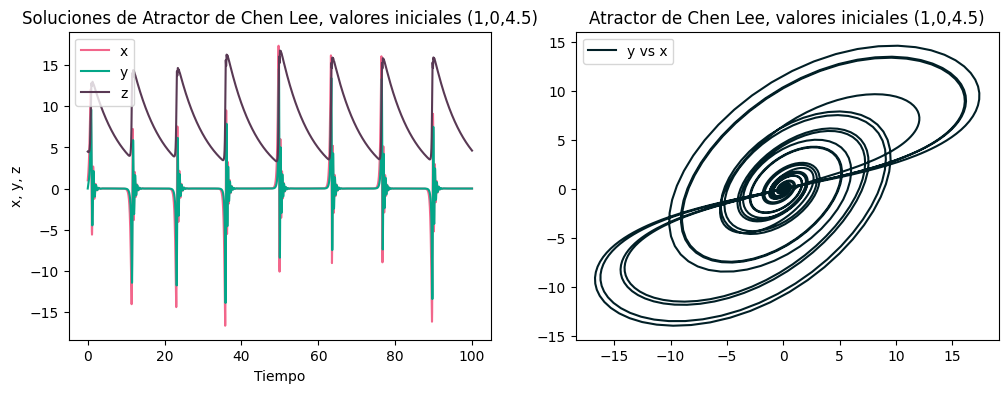

In [441]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return a*x-y*z
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return b*y+x*z
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return (c*z+x*y)/ 3.0

#definición de paramcetros donde se da el caos
a = 5
b = -10
c = -0.38

#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)

x = [1]
y = [0]
z = [4.5]

#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))

fig = plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de Atractor de Chen Lee, valores iniciales (1,0,4.5)")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(x,y,label="y vs x",color="#011F26")
plt.title("Atractor de Chen Lee, valores iniciales (1,0,4.5)")
plt.legend()

     

### Caso2. Un valor inicial con un cambio de 0.001
Sean nuevamente los parametros a=5, b=-10, c=-0.38; el tiempo 100, numero de iteraciones 10000 y los valores iniciales de x,y,z (1,0.001,4.5), ojo se realizó un cambio minimo en un unico valor inicial, el de y en un .001.

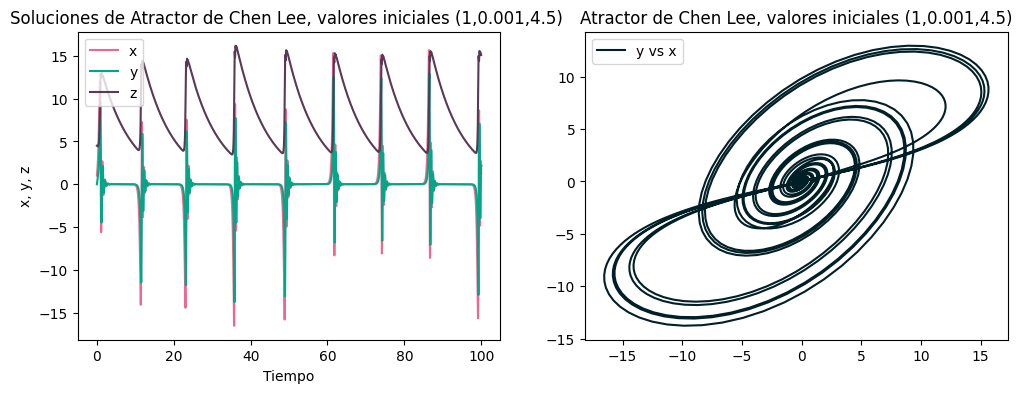

In [442]:
import numpy as np
import matplotlib.pyplot as plt
     
#primera ecuación diferencial: dx/dt
def f(x,y,z):
  return a*x-y*z
#segunda ecuación diferencial: dy/d
def g(x,y,z):
  return b*y+x*z
#tercera ecuación diferencial: dz/d
def j(x,y,z):
  return (c*z+x*y)/ 3.0

#definición de paramcetros donde se da el caos
a = 5
b = -10
c = -0.38

#tiempo
tf=100
#numero de iteraciones
N=10000
#tiempo entre iteraciones
h=tf/N
#paso del tiempo
t=np.linspace(0,tf,N)

x = [1]
y = [0.001]
z = [4.5]

#calculo de kx's, ky's y kz's
for n in range(N-1):
  kx1 = f(x[n],y[n],z[n])
  ky1 = g(x[n],y[n],z[n])
  kz1 = j(x[n],y[n],z[n])
  kx2 = f(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  ky2 = g(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kz2 = j(x[n] + h*kx1/2,y[n] + h*ky1/2,z[n] + h*kz1/2)
  kx3 = f(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  ky3 = g(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kz3 = j(x[n] + h*kx2/2,y[n] + h*ky2/2,z[n] + h*kz2/2)
  kx4 = f(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  ky4 = g(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
  kz4 = j(x[n] + h*kx3,y[n] + h*ky3,z[n] + h*kz3)
#actualizamos x y z 
  x.append(x[n]+(h/6)*(kx1 + 2*kx2 + 2*kx3 + kx4))
  y.append(y[n]+(h/6)*(ky1 + 2*ky2 + 2*ky3 + ky4))
  z.append(z[n]+(h/6)*(kz1 + 2*kz2 + 2*kz3 + kz4))

fig = plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
plt.plot(t,x,label="x", color="#F2668B")
plt.plot(t,y,label="y", color="#03A688")
plt.plot(t,z,label="z", color="#593954")
plt.title("Soluciones de Atractor de Chen Lee, valores iniciales (1,0.001,4.5) ")
plt.xlabel("Tiempo")
plt.ylabel("x, y, z")
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(x,y,label="y vs x",color="#011F26")
plt.title("Atractor de Chen Lee, valores iniciales (1,0.001,4.5)")
plt.legend()

     

Analicemos con atención ambas gráficas de xyz vs el tiempo para encontrar que cambios se producieron por ese minimo valor inicial distinto en 0.001...
de t=0 hasta t=36aprox se notan igual, comienzan igual se comportan igual en el principio; luego observese en el pico que ambas tienen entre t=40 y t=60 sucede un cambio notable: en el caso 1 ambos x y y crecen hasta tomar su valor maximo en el rango que es igual a 15, en cambio para el caso 2 estas dos variables decrecen, bajando bastante produciendo un pico negativo hasta -14. Luego de t=60 a t=80 pareciera se comportan igual pero luego despues de t=80 el primer caso ya solo produce un pico y es de decrecimiento mientras que el caso 2 produce dos picos más uno de crecimiento y otro de declive, incluso z logra graficar otra subida. Esto si se nota en las gráficas 2D del atractor de Chen Lee pues tan solo por la falta de ese maximo que solo toma el caso 1, el eje y de la gráfica del caso 2 no llega al 15, maximo toma valor de 10. Tambien se nota en las orbitas más amplias, que en la penultima orbita se nota más rellena, la solución pasa más de una vez por ahi.
Se comprobó que las condiciones iniciales afectan la trayectoria, si se trata de un sistema caotico.

Hay orden en el caos... Hay caos en el orden. 
Con solo una cifra significativa se obtienen trayectorias completamente diferentes en los resultados.
Se puede encontrar periocidad entre comportamientos caoticos y viceversa.
Es muy sencillo que un sistema se vuelva caotico.
No es sencillo encontrar puntos fijos para los sistemas.
Se puede observar como crece el sistema haciendo iteración e imprimiendo para cada una a falta de animaciones.
El caos es muy bello y es inevitable querer encontrar orden en el y puede que no hay convergencia pero si hay patrones.

Referencias bibliograficas

[1] Edward Lorenz, 1963, Deterministic Nonperiodic Flow

[2] Otto Rössler, 1976, Different types of chaos in two simple differential equations

[3] Francisco Guzman, 2023, Numerical Methods for Initial Value Problems in Physics

[4] Steven H. Strogatz, 2018, Non linear dynamics and Chaos

https://www.sciencedirect.com/science/article/pii/S0096300314017937#b0305

https://labs.ni.gsu.edu/ashilnikov/pubs/lorenz_rossler_ml.pdf
